In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data Collection for Regression.csv');

In [3]:
df

,Timestamp,Age,Sex,Height in (cm),Weight in (kilograms)
0,2023/03/18 1:41:28 PM GMT+8,21,Female,158,47
1,2023/03/18 1:41:32 PM GMT+8,20,Male,180,54
2,2023/03/18 1:41:52 PM GMT+8,20,Male,178,85
3,2023/03/18 1:41:57 PM GMT+8,21,Male,152.4,43
4,2023/03/18 1:42:00 PM GMT+8,21,Male,165,89
...,...,...,...,...,...
95,2023/03/18 1:49:45 PM GMT+8,30,Male,200,50
96,2023/03/18 1:49:54 PM GMT+8,22,Male,174,65
97,2023/03/18 1:50:06 PM GMT+8,21,Male,160,45
98,2023/03/18 1:50:21 PM GMT+8,25,Male,175,65


In [4]:
df.shape

(100, 5)

In [5]:
df.columns

Index(['Timestamp', 'Age', 'Sex', 'Height in (cm)', 'Weight in (kilograms)'], dtype='object')

In [6]:
df['Height in (cm)'] = df['Height in (cm)'].str.extract(r'(\d+)', expand=False);
df['Weight in (kilograms)'] = df['Weight in (kilograms)'].str.extract(r'(\d+)', expand=False);

In [7]:
df.dtypes

Timestamp                object
Age                       int64
Sex                      object
Height in (cm)           object
Weight in (kilograms)    object
dtype: object

In [8]:
df

,Timestamp,Age,Sex,Height in (cm),Weight in (kilograms)
0,2023/03/18 1:41:28 PM GMT+8,21,Female,158,47
1,2023/03/18 1:41:32 PM GMT+8,20,Male,180,54
2,2023/03/18 1:41:52 PM GMT+8,20,Male,178,85
3,2023/03/18 1:41:57 PM GMT+8,21,Male,152,43
4,2023/03/18 1:42:00 PM GMT+8,21,Male,165,89
...,...,...,...,...,...
95,2023/03/18 1:49:45 PM GMT+8,30,Male,200,50
96,2023/03/18 1:49:54 PM GMT+8,22,Male,174,65
97,2023/03/18 1:50:06 PM GMT+8,21,Male,160,45
98,2023/03/18 1:50:21 PM GMT+8,25,Male,175,65


In [9]:
df['Height in (cm)'] = pd.to_numeric(df['Height in (cm)'])
df['Weight in (kilograms)'] = pd.to_numeric(df['Weight in (kilograms)'])

In [10]:
df.dtypes

Timestamp                object
Age                       int64
Sex                      object
Height in (cm)            int64
Weight in (kilograms)     int64
dtype: object

In [11]:
df.shape

(100, 5)

In [12]:
df.isna().sum()

Timestamp                0
Age                      0
Sex                      0
Height in (cm)           0
Weight in (kilograms)    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop(['Timestamp'], axis =1, inplace=True)

<AxesSubplot:xlabel='Age', ylabel='count'>

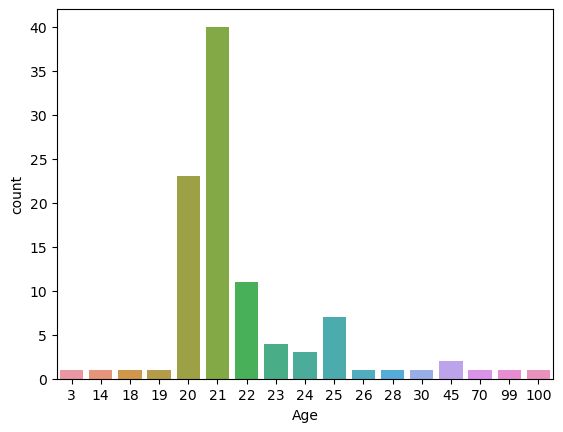

In [15]:
sns.countplot(df['Age'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

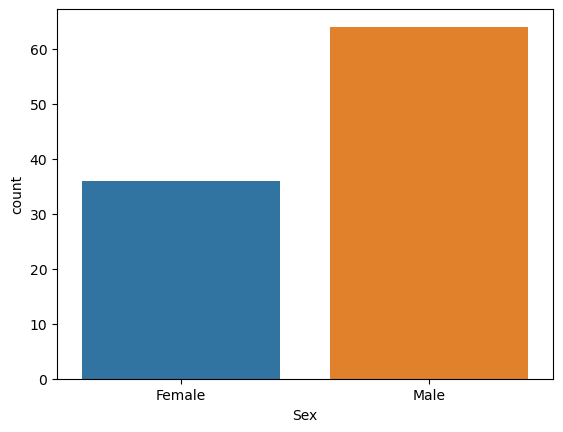

In [16]:
sns.countplot(df['Sex'])

In [17]:
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})

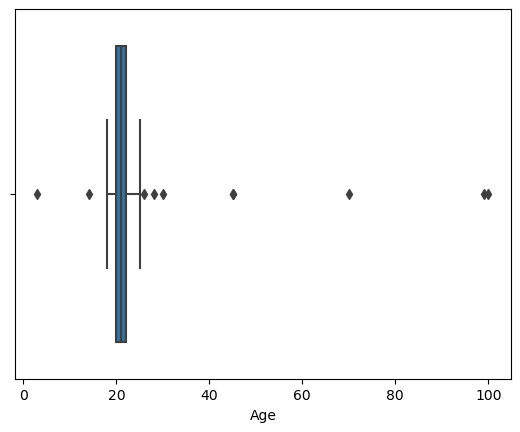

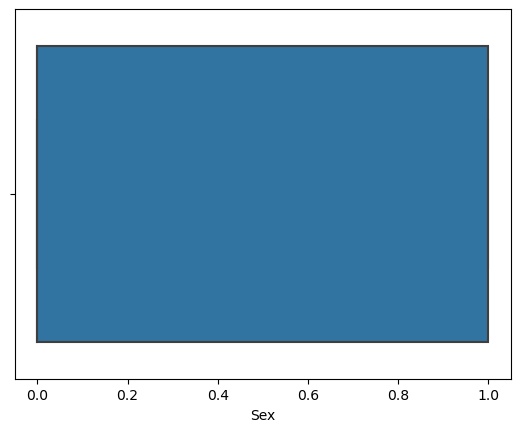

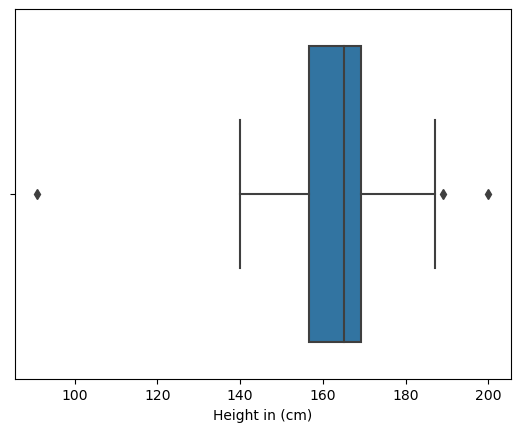

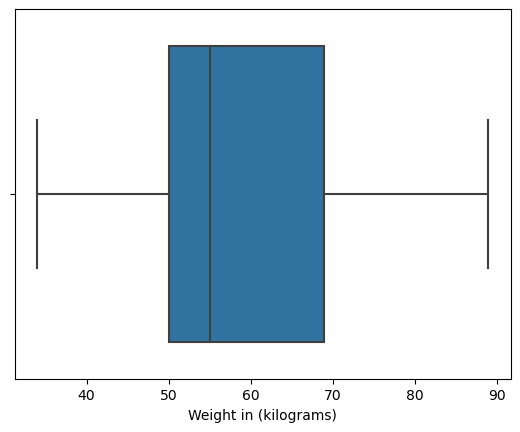

In [18]:
for col in df.columns:
    plt.figure()
    sns.boxplot(df[col])

In [19]:

def remove_outliers(df,col):
    q1 = df[col].quantile(0.25);
    q3 = df[col].quantile(0.75);
    iqr = q3 - q1;
    
    max_ = q3 + (1.5*iqr);
    min_ = q1 - (1.5*iqr);
    
    df.loc[df[col] < min_,col] = min_;
    df.loc[df[col] > max_,col] = max_;

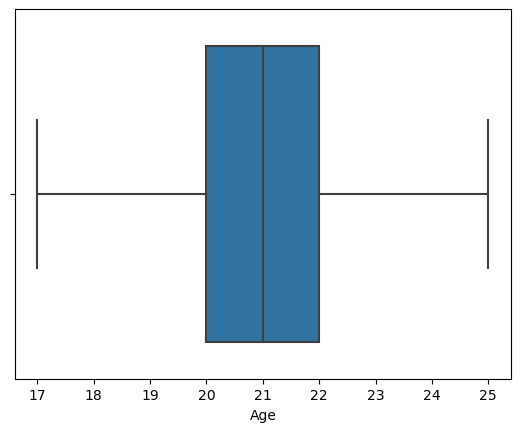

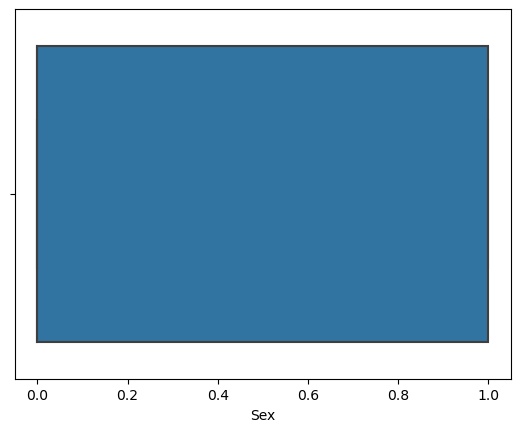

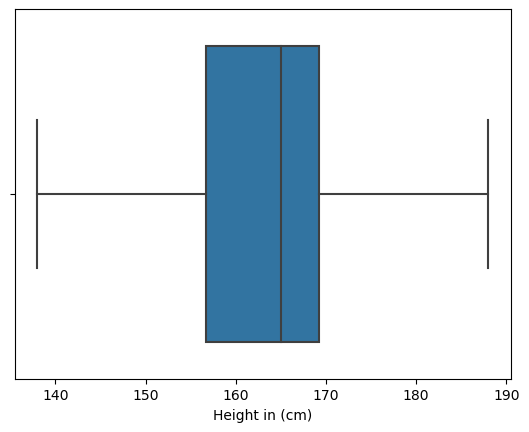

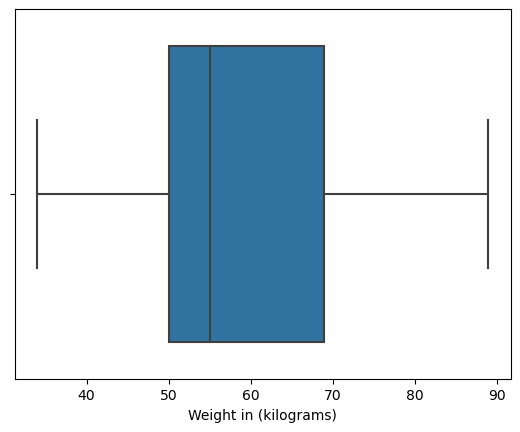

In [20]:
for col in df.columns:
        plt.figure()
        remove_outliers(df,col)
        sns.boxplot(df[col])

<AxesSubplot:>

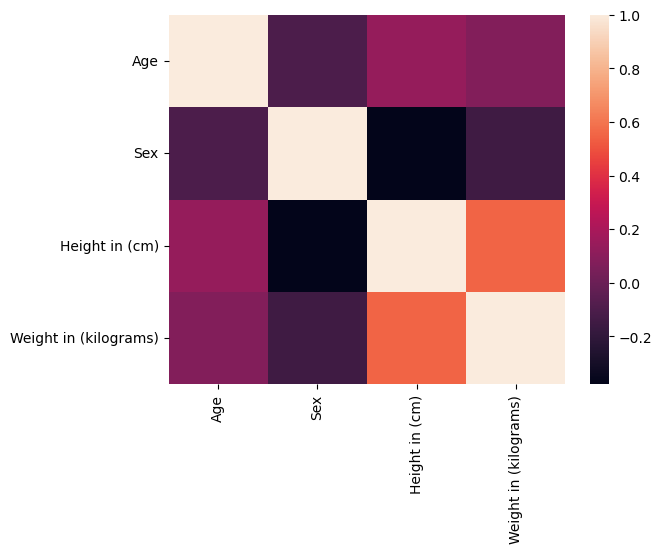

In [21]:
sns.heatmap(df.corr())

In [22]:
from sklearn.model_selection import train_test_split 

In [23]:
X = df.drop(['Weight in (kilograms)'],axis=1)
y = df['Weight in (kilograms)']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=.80);

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [26]:
def evaluate_model(model):
    y_pred = model.predict(X_test);
    print('r^2 Score: ', r2_score(y_test, y_pred)) # accuracy score
    print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred)); #closer to zero, better
    print('Root Mean Square Eror: ', np.sqrt(mean_squared_error(y_test, y_pred)))  #closer to zero, better
    
    plt.scatter(y_train, model.predict(X_train), color='g')
    plt.plot(y_pred, y_pred)
    plt.show()

LinearRegression()
r^2 Score:  0.11088024693878429
Mean Absolute Error:  9.879700697154197
Root Mean Square Eror:  12.528930217818186


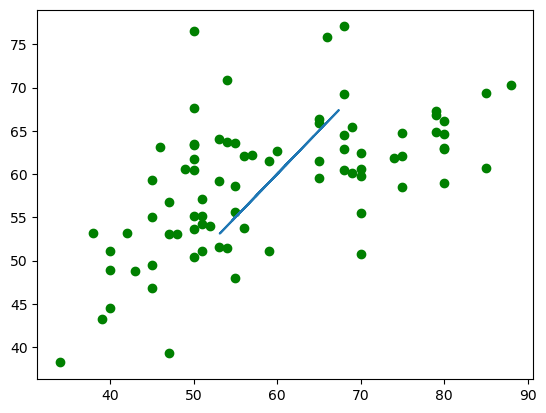

GradientBoostingRegressor()
r^2 Score:  -0.055052482688759063
Mean Absolute Error:  10.674786915852248
Root Mean Square Eror:  13.648059049502256


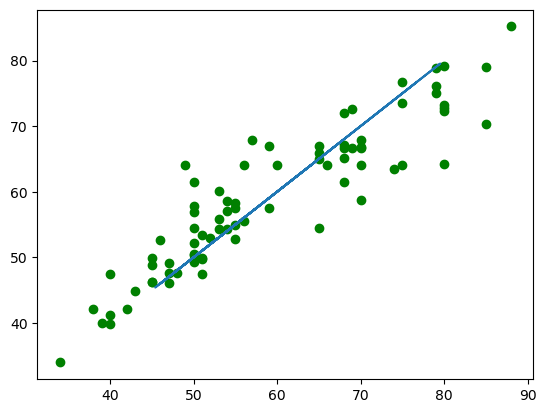

ElasticNet()
r^2 Score:  0.2074966207286194
Mean Absolute Error:  9.06248610203565
Root Mean Square Eror:  11.828629320862253


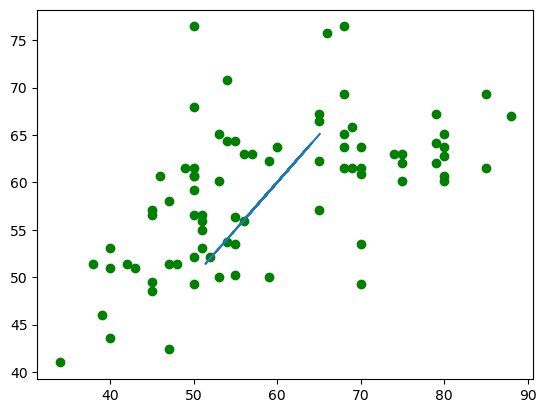

SGDRegressor()
r^2 Score:  -5.515192831032873e+24
Mean Absolute Error:  31190208390231.387
Root Mean Square Eror:  31204283268789.457


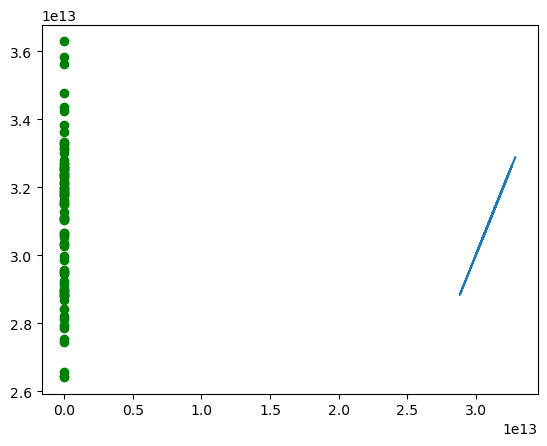

BayesianRidge()
r^2 Score:  0.2081277662503329
Mean Absolute Error:  9.082604197660766
Root Mean Square Eror:  11.823918253629113


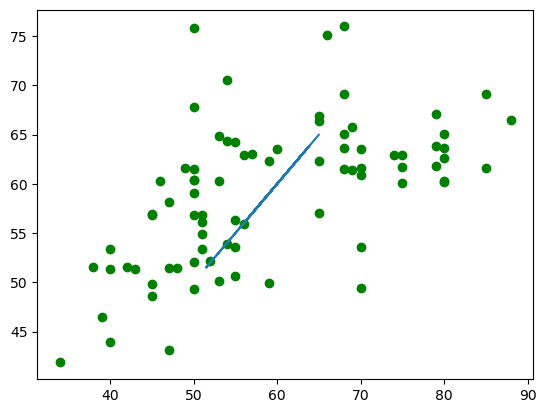

KernelRidge()
r^2 Score:  0.06844807367096073
Mean Absolute Error:  10.481794915604405
Root Mean Square Eror:  12.82441002905755


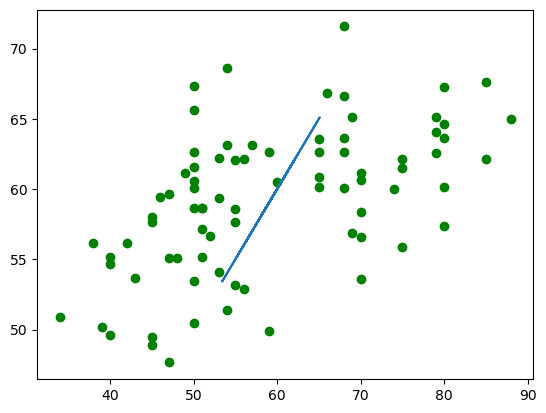

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
r^2 Score:  -0.1346828202187622
Mean Absolute Error:  11.749872016906739
Root Mean Square Eror:  14.153736323304264


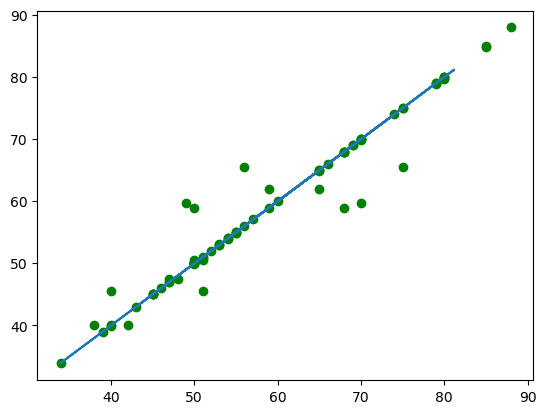

LGBMRegressor()
r^2 Score:  0.13635893870103832
Mean Absolute Error:  9.589178403019503
Root Mean Square Eror:  12.348110356339213


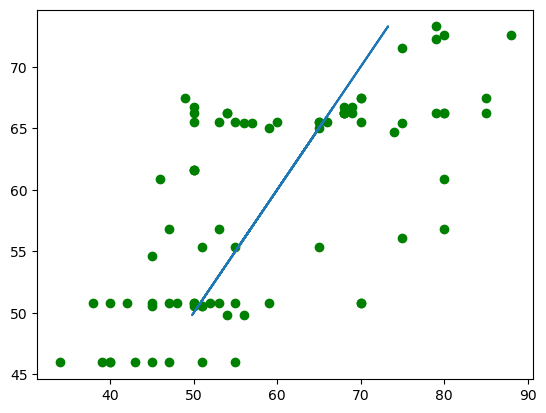

RandomForestRegressor()
r^2 Score:  0.16584345032333436
Mean Absolute Error:  9.96158630952381
Root Mean Square Eror:  12.13549911810039


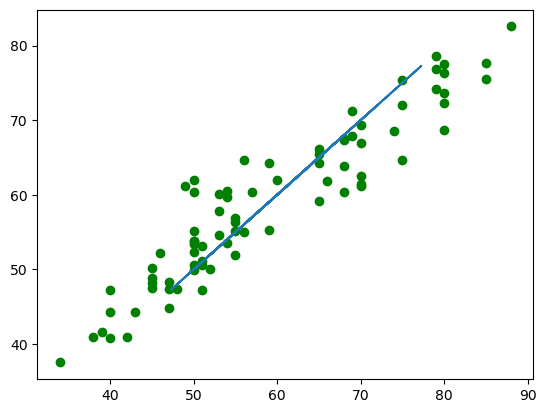

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor;
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge;
from xgboost import XGBRegressor;
from lightgbm import LGBMRegressor;
from sklearn.ensemble import RandomForestRegressor


models = [LinearRegression(), GradientBoostingRegressor(), ElasticNet(), SGDRegressor(), 
          BayesianRidge(), KernelRidge(), XGBRegressor(), LGBMRegressor(), RandomForestRegressor()]
for model in models:
    print(model)
    model.fit(X_train, y_train)
    evaluate_model(model)



In [29]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
params = pd.DataFrame([[20, 0 , 162]]);

predict = rf.predict(params)
print('Predicted Weight: ', predict)

Predicted Weight:  [47.97016667]
